# Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import plotly.express as px
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leitura dos datasets

In [3]:
RF_noStem = pd.read_csv('/content/drive/MyDrive/ProjetoFinal_ProcessText/predict_datasets/RF_noStem_predict.csv',index_col=0)
RF_noStem['sent_rating'] = RF_noStem['sent_rating'].replace({'positivo':1,'negativo':0})

RF_Stem = pd.read_csv('/content/drive/MyDrive/ProjetoFinal_ProcessText/predict_datasets/RF_Stem_predict.csv',index_col=0)
RF_Stem['sent_rating'] = RF_Stem['sent_rating'].replace({'positivo':1,'negativo':0})

CNN = pd.read_csv('/content/drive/MyDrive/ProjetoFinal_ProcessText/predict_datasets/CNN_predict.csv',index_col=0)
CNN['sent_rating'] = CNN['sent_rating'].replace({'positivo':1,'negativo':0})

LSTM = pd.read_csv('/content/drive/MyDrive/ProjetoFinal_ProcessText/predict_datasets/LSTM_predict.csv',index_col=0)
LSTM['sent_rating'] = LSTM['sent_rating'].replace({'positivo':1,'negativo':0})

BERT = pd.read_csv('/content/drive/MyDrive/ProjetoFinal_ProcessText/predict_datasets/BERT_predict.csv',index_col=0)
BERT['sent_rating'] = BERT['sent_rating'].replace({'positivo':1,'negativo':0})

# Matrizes de confusão

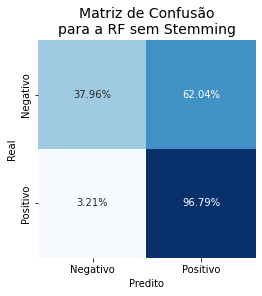

In [4]:
ax=plt.subplot()
cfm_RF_noStem = confusion_matrix(RF_noStem['sent_rating'],RF_noStem['predict'],normalize='true')
fig = sns.heatmap(cfm_RF_noStem, annot=True, fmt='.2%', cmap='Blues', cbar=False, square=True, ax=ax,
                  xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
ax.set_title("Matriz de Confusão\npara a RF sem Stemming",fontsize=14)
ax.set_xlabel('Predito');ax.set_ylabel('Real');

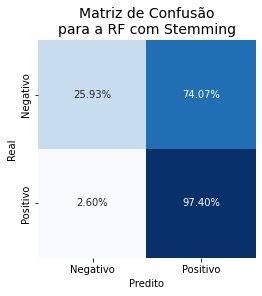

In [5]:
ax=plt.subplot()
cfm_RF_Stem = confusion_matrix(RF_Stem['sent_rating'],RF_Stem['predict'],normalize='true')
fig = sns.heatmap(cfm_RF_Stem, annot=True, fmt='.2%', cmap='Blues', cbar=False, square=True, ax=ax,
                  xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
ax.set_title("Matriz de Confusão\npara a RF com Stemming",fontsize=14)
ax.set_xlabel('Predito');ax.set_ylabel('Real');

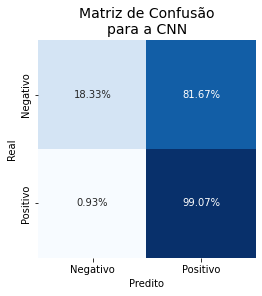

In [6]:
ax=plt.subplot()
cfm_CNN = confusion_matrix(CNN['sent_rating'],CNN['predict'],normalize='true')
fig = sns.heatmap(cfm_CNN, annot=True, fmt='.2%', cmap='Blues', cbar=False, square=True, ax=ax,
                  xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
ax.set_title("Matriz de Confusão\npara a CNN",fontsize=14)
ax.set_xlabel('Predito');ax.set_ylabel('Real');

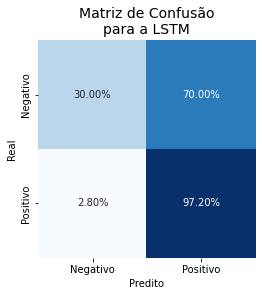

In [7]:
ax=plt.subplot()
cfm_LSTM = confusion_matrix(LSTM['sent_rating'],LSTM['predict'],normalize='true')
fig = sns.heatmap(cfm_LSTM, annot=True, fmt='.2%', cmap='Blues', cbar=False, square=True, ax=ax,
                  xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
ax.set_title("Matriz de Confusão\npara a LSTM",fontsize=14)
ax.set_xlabel('Predito');ax.set_ylabel('Real');

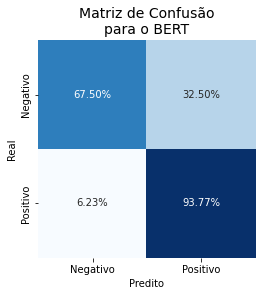

In [8]:
ax=plt.subplot()
cfm_BERT = confusion_matrix(BERT['sent_rating'],BERT['predict'],normalize='true')
fig = sns.heatmap(cfm_BERT, annot=True, fmt='.2%', cmap='Blues', cbar=False, square=True, ax=ax,
                  xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
ax.set_title("Matriz de Confusão\npara o BERT",fontsize=14)
ax.set_xlabel('Predito');ax.set_ylabel('Real');

# Gráficos de barra

In [9]:
evaluations_df = pd.DataFrame(columns=['Precisão','Revocação','F1','F1 weighted'],
                              index=['RF sem stem','RF com stem','CNN','LSTM','BERT'])
evaluations_df['Precisão'] = [precision_score(RF_noStem['sent_rating'],RF_noStem['predict']),
                              precision_score(RF_Stem['sent_rating'],RF_Stem['predict']),
                              precision_score(CNN['sent_rating'],CNN['predict']),
                              precision_score(LSTM['sent_rating'],LSTM['predict']),
                              precision_score(BERT['sent_rating'],BERT['predict'])]

evaluations_df['Revocação'] = [recall_score(RF_noStem['sent_rating'],RF_noStem['predict']),
                              recall_score(RF_Stem['sent_rating'],RF_Stem['predict']),
                              recall_score(CNN['sent_rating'],CNN['predict']),
                              recall_score(LSTM['sent_rating'],LSTM['predict']),
                              recall_score(BERT['sent_rating'],BERT['predict'])]

evaluations_df['F1'] = [f1_score(RF_noStem['sent_rating'],RF_noStem['predict'],average = 'binary'),
                        f1_score(RF_Stem['sent_rating'],RF_Stem['predict'],average = 'binary'),
                        f1_score(CNN['sent_rating'],CNN['predict'],average = 'binary'),
                        f1_score(LSTM['sent_rating'],LSTM['predict'],average = 'binary'),
                        f1_score(BERT['sent_rating'],BERT['predict'],average = 'binary')]

evaluations_df['F1 weighted'] = [f1_score(RF_noStem['sent_rating'],RF_noStem['predict'],average = 'weighted'),
                                 f1_score(RF_Stem['sent_rating'],RF_Stem['predict'],average = 'weighted'),
                                 f1_score(CNN['sent_rating'],CNN['predict'],average = 'weighted'),
                                 f1_score(LSTM['sent_rating'],LSTM['predict'],average = 'weighted'),
                                 f1_score(BERT['sent_rating'],BERT['predict'],average = 'weighted')]

In [10]:
evaluations_df = evaluations_df.reset_index()
eval_melt_df = evaluations_df.melt(id_vars='index')
eval_melt_df = eval_melt_df.rename(columns={'index':'Modelo','variable':'Metrica','value':'Valor'})

In [11]:
import plotly.express as px

In [12]:
fig = px.bar(eval_melt_df, y='Valor', x = 'Modelo',
            title = 'Metricas para RF sem stemming',
            text='Valor',color= 'Metrica',barmode='group')
fig.update_layout(autosize=True,width=1200, height=500,title={'font':{'size':18},'x':0.5})
fig.update_traces(texttemplate='%{text:.3f}')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(type='category')
fig.show()

# Plots ao longo do tempo

In [13]:
RF_noStem['sent_rating'] = RF_noStem['sent_rating'].replace({1:'positivo',0:'negativo'})
RF_noStem['predict'] = RF_noStem['predict'].replace({1:'positivo',0:'negativo'})

RF_Stem['sent_rating'] = RF_Stem['sent_rating'].replace({1:'positivo',0:'negativo'})
RF_Stem['predict'] = RF_Stem['predict'].replace({1:'positivo',0:'negativo'})

CNN['sent_rating'] = CNN['sent_rating'].replace({1:'positivo',0:'negativo'})
CNN['predict'] = CNN['predict'].replace({1:'positivo',0:'negativo'})

LSTM['sent_rating'] = LSTM['sent_rating'].replace({1:'positivo',0:'negativo'})
LSTM['predict'] = LSTM['predict'].replace({1:'positivo',0:'negativo'})

BERT['sent_rating'] = BERT['sent_rating'].replace({1:'positivo',0:'negativo'})
BERT['predict'] = BERT['predict'].replace({1:'positivo',0:'negativo'})

In [14]:
from datetime import date, timedelta, datetime

start_date = datetime.strptime(RF_noStem.groupby('data').count().index.min(),'%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime(RF_noStem.groupby('data').count().index.max(),'%Y-%m-%d %H:%M:%S')

delta = end_date - start_date

days = [str(start_date + timedelta(days=i)) for i in range(delta.days + 1)]
all_days_df = pd.DataFrame(index=days)

In [15]:
RF_noStem_pos = RF_noStem[RF_noStem['predict']=='positivo']
RF_noStem_pos = RF_noStem_pos[['predict','data']]
RF_noStem_pos = RF_noStem_pos.groupby('data').count()
RF_noStem_pos = pd.concat([all_days_df, RF_noStem_pos], axis=1)
RF_noStem_pos = RF_noStem_pos.fillna(0)
RF_noStem_pos.reset_index(level=0, inplace=True)
RF_noStem_pos['sentimento'] = 'Positivo'

RF_noStem_neg = RF_noStem[RF_noStem['predict']=='negativo']
RF_noStem_neg = RF_noStem_neg[['predict','data']]
RF_noStem_neg = RF_noStem_neg.groupby('data').count()
RF_noStem_neg = pd.concat([all_days_df, RF_noStem_neg], axis=1)
RF_noStem_neg = RF_noStem_neg.fillna(0)
RF_noStem_neg.reset_index(level=0, inplace=True)
RF_noStem_neg['sentimento'] = 'Negativo'

RF_noStem_time = pd.concat([RF_noStem_pos,RF_noStem_neg],ignore_index=True)

In [16]:
fig = px.line(RF_noStem_time, y='predict', x = 'index',
            labels = {'index':'Data','predict':'Quantidade de avaliações'},
            title = 'Quantidade de Prediçõe de avaliações positivas e negativas ao longo do tempo pelo RF sem stemming',
            color='sentimento')
fig.update_layout(autosize=True,width=1000, height=350,title={'font':{'size':18}})
fig.update_xaxes(visible=True, showticklabels=False)
fig.show()

In [17]:
RF_Stem_pos = RF_Stem[RF_Stem['predict']=='positivo']
RF_Stem_pos = RF_Stem_pos[['predict','data']]
RF_Stem_pos = RF_Stem_pos.groupby('data').count()
RF_Stem_pos = pd.concat([all_days_df, RF_Stem_pos], axis=1)
RF_Stem_pos = RF_Stem_pos.fillna(0)
RF_Stem_pos.reset_index(level=0, inplace=True)
RF_Stem_pos['sentimento'] = 'Positivo'

RF_Stem_neg = RF_Stem[RF_Stem['predict']=='negativo']
RF_Stem_neg = RF_Stem_neg[['predict','data']]
RF_Stem_neg = RF_Stem_neg.groupby('data').count()
RF_Stem_neg = pd.concat([all_days_df, RF_Stem_neg], axis=1)
RF_Stem_neg = RF_Stem_neg.fillna(0)
RF_Stem_neg.reset_index(level=0, inplace=True)
RF_Stem_neg['sentimento'] = 'Negativo'

RF_Stem_time = pd.concat([RF_Stem_pos,RF_Stem_neg],ignore_index=True)

In [18]:
fig = px.line(RF_Stem_time, y='predict', x = 'index',
            labels = {'index':'Data','predict':'Quantidade de avaliações'},
            title = 'Quantidade de Prediçõe de avaliações positivas e negativas ao longo do tempo pelo RF com stemming',
            color='sentimento')
fig.update_layout(autosize=True,width=1000, height=350,title={'font':{'size':18}})
fig.update_xaxes(visible=True, showticklabels=False)
fig.show()

In [19]:
CNN_pos = CNN[CNN['predict']=='positivo']
CNN_pos = CNN_pos[['predict','data']]
CNN_pos = CNN_pos.groupby('data').count()
CNN_pos = pd.concat([all_days_df, CNN_pos], axis=1)
CNN_pos = CNN_pos.fillna(0)
CNN_pos.reset_index(level=0, inplace=True)
CNN_pos['sentimento'] = 'Positivo'

CNN_neg = CNN[CNN['predict']=='negativo']
CNN_neg = CNN_neg[['predict','data']]
CNN_neg = CNN_neg.groupby('data').count()
CNN_neg = pd.concat([all_days_df, CNN_neg], axis=1)
CNN_neg = CNN_neg.fillna(0)
CNN_neg.reset_index(level=0, inplace=True)
CNN_neg['sentimento'] = 'Negativo'

CNN_time = pd.concat([CNN_pos,CNN_neg],ignore_index=True)

In [20]:
fig = px.line(CNN_time, y='predict', x = 'index',
            labels = {'index':'Data','predict':'Quantidade de avaliações'},
            title = 'Quantidade de Prediçõe de avaliações positivas e negativas ao longo do tempo pela CNN',
            color='sentimento')
fig.update_layout(autosize=True,width=1000, height=350,title={'font':{'size':18}})
fig.update_xaxes(visible=True, showticklabels=False)
fig.show()

In [21]:
LSTM_pos = LSTM[LSTM['predict']=='positivo']
LSTM_pos = LSTM_pos[['predict','data']]
LSTM_pos = LSTM_pos.groupby('data').count()
LSTM_pos = pd.concat([all_days_df, LSTM_pos], axis=1)
LSTM_pos = LSTM_pos.fillna(0)
LSTM_pos.reset_index(level=0, inplace=True)
LSTM_pos['sentimento'] = 'Positivo'

LSTM_neg = LSTM[LSTM['predict']=='negativo']
LSTM_neg = LSTM_neg[['predict','data']]
LSTM_neg = LSTM_neg.groupby('data').count()
LSTM_neg = pd.concat([all_days_df, LSTM_neg], axis=1)
LSTM_neg = LSTM_neg.fillna(0)
LSTM_neg.reset_index(level=0, inplace=True)
LSTM_neg['sentimento'] = 'Negativo'

LSTM_time = pd.concat([LSTM_pos,LSTM_neg],ignore_index=True)

In [22]:
fig = px.line(LSTM_time, y='predict', x = 'index',
            labels = {'index':'Data','predict':'Quantidade de avaliações'},
            title = 'Quantidade de Prediçõe de avaliações positivas e negativas ao longo do tempo pelo LSTM',
            color='sentimento')
fig.update_layout(autosize=True,width=1000, height=350,title={'font':{'size':18}})
fig.update_xaxes(visible=True, showticklabels=False)
fig.show()

In [23]:
BERT_pos = BERT[BERT['predict']=='positivo']
BERT_pos = BERT_pos[['predict','data']]
BERT_pos = BERT_pos.groupby('data').count()
BERT_pos = pd.concat([all_days_df, BERT_pos], axis=1)
BERT_pos = BERT_pos.fillna(0)
BERT_pos.reset_index(level=0, inplace=True)
BERT_pos['sentimento'] = 'Positivo'

BERT_neg = BERT[BERT['predict']=='negativo']
BERT_neg = BERT_neg[['predict','data']]
BERT_neg = BERT_neg.groupby('data').count()
BERT_neg = pd.concat([all_days_df, BERT_neg], axis=1)
BERT_neg = BERT_neg.fillna(0)
BERT_neg.reset_index(level=0, inplace=True)
BERT_neg['sentimento'] = 'Negativo'

BERT_time = pd.concat([BERT_pos,BERT_neg],ignore_index=True)

In [24]:
fig = px.line(BERT_time, y='predict', x = 'index',
            labels = {'index':'Data','predict':'Quantidade de avaliações'},
            title = 'Quantidade de Prediçõe de avaliações positivas e negativas ao longo do tempo pelo BERT',
            color='sentimento')
fig.update_layout(autosize=True,width=1000, height=350,title={'font':{'size':18}})
fig.update_xaxes(visible=True, showticklabels=False)
fig.show()